First, run the following block to set up the variables needed for later sections.

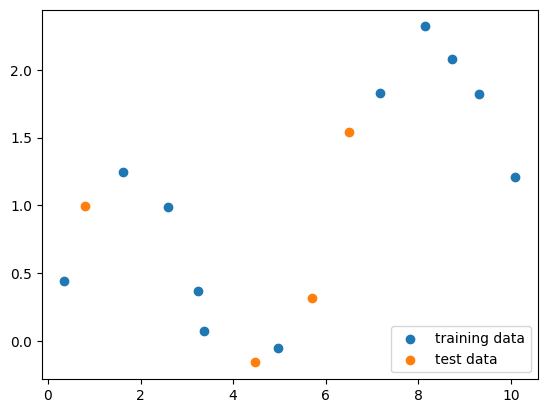

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

# print(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def plot_scatter():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

plot_scatter()

In [2]:
X_train.shape

(11,)

### Question 1

Write a function that fits a polynomial `LinearRegression` model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use `PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.
The below figure shows the fitted models plotted on top of the original data (using `plot_answer()` defined below).


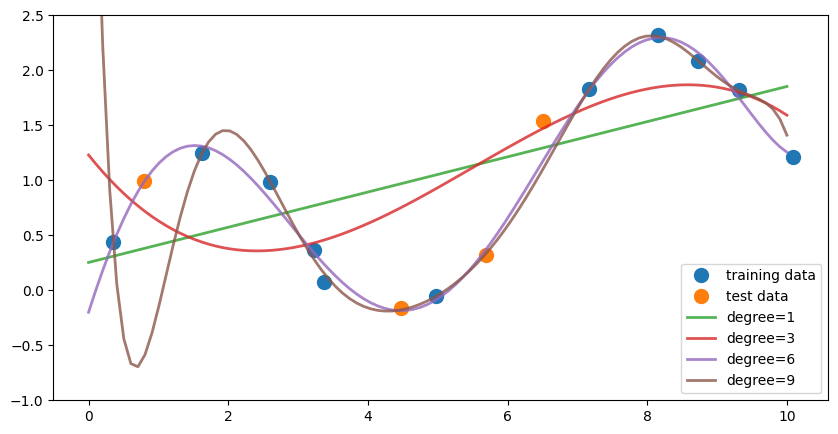

In [7]:
# You are provided a function `plot_answer()` to plot results
def plot_answer(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_answer(answer())

*This function should return a numpy array with shape `(4, 100)`*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
def predict_single_degree(degree):
    """Given the degree of the polynomial, compute the predictions."""

    X_train_rsh = X_train.reshape((X_train.size, 1))
    X_train_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_train_rsh)
    lin_regr = LinearRegression().fit(X_train_poly_feats, y_train)

    X_pred = np.linspace(0, 10, 100).reshape((100, 1))
    X_pred_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_pred)
    predictions = lin_regr.predict(X_pred_poly_feats)

    return predictions

def answer():
    degrees = [1, 3, 6, 9]
    num_degrees = len(degrees)
    degree_predictions = np.zeros((num_degrees, 100))

    for i in range(num_degrees):
        degree_predictions[i, :] = predict_single_degree(degrees[i])

    return degree_predictions

answer()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [10]:
def scores_single_degree(degree):
    X_train_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_train.reshape((X_train.size, 1)))
    X_test_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_test.reshape((X_test.size, 1)))
    lin_regr = LinearRegression().fit(X_train_poly_feats, y_train)
    
    y_train_pred = lin_regr.predict(X_train_poly_feats)
    y_test_pred = lin_regr.predict(X_test_poly_feats)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return (r2_train, r2_test)


def answer_two():
    degrees = [degree for degree in range(10)]
    num_degrees = len(degrees)
    scores_train = np.zeros(num_degrees)
    scores_test = np.zeros(num_degrees)

    for i in range(num_degrees):
        scores_tuple = scores_single_degree(degrees[i])
        scores_train[i] = scores_tuple[0]
        scores_test[i] = scores_tuple[1]

    return (scores_train, scores_test)

answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247953, -0.64525316]))

### Question 3

#### Polynomial linear regression

Let us represent the fuselage length and maximum weigh pairs as follows:

$$
(x_1, y_1), (x_2, y_2), \cdots ,(x_N, y_N)
$$

Polynomial regression is still classified as a **linear regression problem**, since the coefficients of the model is linearly related.

Similar to the previous multiple linear regression, we can right the model in matrix format.

$$
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_N
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^k\\
1 & x_2 & x_2^2 & \dots & x_2^k\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_N & x_N^2 & \dots & x_N^k
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ \beta_1 \\ \vdots \\ \beta_k
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_0 \\ \epsilon_1 \\ \vdots \\ \epsilon_n
\end{bmatrix}
$$

And can be written as:

$$
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \epsilon
$$

We need to minimized the gradient of the RSS:

$$
\nabla RSS(\beta) = \frac{\partial RSS}{\partial \beta} = -2 \mathbf{X}^T(\mathbf{y} - \mathbf{X} \beta) = 0
$$



The optimal $\hat \beta$ has the closed-form solution of:

$$
\hat \beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} \\
$$

#### Please implement the polynomial regression as descibed above in Python

In [11]:
def polynomial_regression(x, y, k):
    X = np.vander(x, k+1, increasing=True)
    Y = y.reshape(-1, 1)

    res = np.dot(X.T, X)
    res = np.dot(np.linalg.inv(res), X.T)
    res = np.dot(res, Y)

    coef = res.squeeze()
    return coef

#### You are given a dataset `aircraft.csv`, please load it and organize the train and test sets as follow:


In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("figure", figsize=(8, 6))
matplotlib.rc("font", size=14)

df = pd.read_csv("aircraft.csv", index_col=0)

train_acs = "A320,A333,A343,A359,B737,B744,B748,B752,B763,B773,B789,C550,E145,E190"
train_acs = train_acs.split(",")

df_train = df.query("index in @train_acs")
df_test = df.query("index not in @train_acs")

x_train = df_train.length.values
y_train = df_train.max_weight.values

x_test = df_test.length.values
y_test = df_test.max_weight.values


You can plot the actual data in a plot by using the code below:

In [ ]:
from common import plot_data, plot_linear_model
fig, ax = plt.subplots(1)
plot_data(ax, df_train, df_test, xcol="length", ycol="max_weight", show_test=True, show_type=True)

#### Fit the model polynomial regression with `(x_train, y_train)`

#### Plot the model and the actual data in a plot by using the plot function `plot_poly` as follow:

In [33]:
def plot_poly(ax, x, coef):
    x_ = np.linspace(min(x), max(x), 100)
    y_ = np.zeros(len(x_))
    for i, c in enumerate(coef):
        y_ += c * x_**i
    ax.plot(x_, y_)

           3          2
0.0006635 x + 0.0181 x + 0.2366 x - 3.663


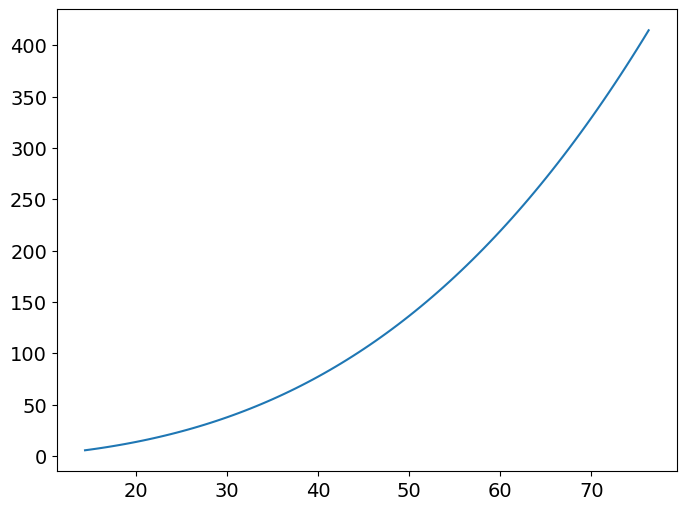

In [34]:
k=3
coef = polynomial_regression(x_train, y_train, k)
print(np.poly1d(coef[::-1]))

fig, ax = plt.subplots(1)
plot_data(ax, df_train, df_test, xcol="length", ycol="max_weight", show_test=True)
plot_poly(ax, x_train, coef)